# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Cumulative Distribution Functions

A random process can be characterized by the statistical properties of its amplitude values. [Cumulative distribution functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDFs) are one possibility.

### Univariate Cumulative Distribution Function

The univariate CDF $P_x(\theta, k)$ of a continuous-amplitude real-valued random signal $x[k]$ is defined as

$$P_x(\theta, k) := \Pr \{ x[k] \leq \theta\}$$

where $\Pr \{ \cdot \}$ denotes the probability that the given condition holds. The univariate CDF quantifies the probability that for a fixed time index $k$ the condition $x[k] \leq \theta$ holds for the entire ensemble. It has the following properties which can be concluded directly from its definition

$$ \lim_{\theta \to -\infty} P_x(\theta, k) = 0$$

and

$$ \lim_{\theta \to \infty} P_x(\theta, k) = 1$$

The probability that $\theta_1 < x[k] \leq \theta_2$ is given as

\begin{equation}
\Pr \{\theta_1 < x[k] \leq \theta_2\} = P_x(\theta_2, k) - P_x(\theta_1, k)
\end{equation}

Hence, the probability that a continuous-amplitude random signal takes a specific value $x[k]=\theta$ is not defined by the CDF. This motivates the use of the probability density function introduced later.

### Bivariate Cumulative Distribution Function

The bivariate or joint CDF $P_{xy}(\theta_x, \theta_y, k_x, k_y)$ of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

$$P_{xy}(\theta_x, \theta_y, k_x, k_y) := \Pr \{ x[k_x] \leq \theta_x  \wedge y[k_y] \leq \theta_y  \}$$

The joint CDF quantifies the probability that for a fixed $k_x$ the condition $x[k_x] \leq \theta_x$ and for
a fixed $k_y$ the condition $y[k_y] \leq \theta_y$ holds for the entire ensemble of sample functions.

## Probability Density Functions

[Propability density functions](https://en.wikipedia.org/wiki/Probability_density_function) (PDFs) describe the probability for a random signal to take on a given value.

### Univariate Probability Density Function

The univariate PDF $p_x(\theta, k)$ of a continuous-amplitude real-valued random signal $x[k]$ is defined as the derivative of the univariate CDF

$$p_x(\theta, k) = \frac{\partial}{\partial \theta} P_x(\theta, k)$$

Due to the properties of the CDF and the definition of the PDF, it has the following properties

$$p_x(\theta, k) \geq 0$$

and

$$\int\limits_{-\infty}^{\infty} p_x(\theta, k) \, \mathrm{d}\theta = P_x(\infty, k) = 1$$

The CDF can be derived from the PDF by integration

$$P_x(\theta, k) = \int\limits_{-\infty}^{\theta} p_x(\theta, k) \, \mathrm{d}\theta$$

#### Estimate of an univariate PDF/CDF by the histogram

In the process of calculating a [histogram](https://en.wikipedia.org/wiki/Histogram), the entire range of amplitude values of a random signal is split into a series of intervals (bins). Then it is counted how many values of the signal fall into these intervals. This constitutes a numerical approximation of the PDF. 

In the following example the histogram of an ensemble is calculated for each time index $k$. The CDF is approximated by the cumulative sum over the histogram bins.

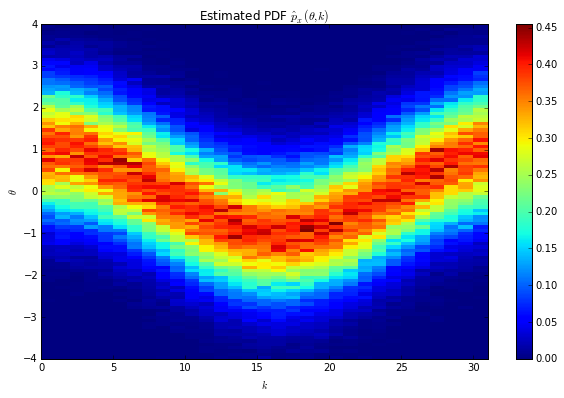

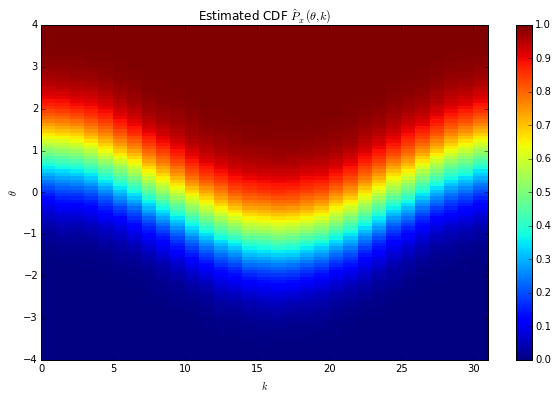

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

K = 32  # number of temporal samples
N = 10000  # number of sample functions
bins = 100  # number of bins for the histogram


# draw sample functions from a random process
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# compute the histogram
px = np.zeros((bins, K))
for n in range(K):
    px[:, n], edges = np.histogram(x[:, n], bins=bins, range=(-4,4), density=True)
    
# compute the CDF
Px = np.cumsum(px, axis=0) * 8/bins

# plot the PDF
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(K), edges, px)
plt.title(r'Estimated PDF $\hat{p}_x(\theta, k)$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\theta$')
plt.colorbar()
plt.autoscale(tight=True)

# plot the CDF
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(K), edges, Px, vmin=0, vmax=1)
plt.title(r'Estimated CDF $\hat{P}_x(\theta, k)$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\theta$')
plt.colorbar()
plt.autoscale(tight=True)

**Exercise**

* Change the parameters `N` and `bins` and rerun the cell. What changes? Why?

In numerical simulations of random processes only a finite number of sample functions and temporal samples can be considered. This holds also for the number of intervals (bins) used for the histogram. As a result, numerical approximations of the CDF/PDF will be subject to statistical uncertainties that typically will become smaller if the number of sample functions is increased.

### Bivariate Probability Density Function

The bivariate or joint PDF $p_{xy}(\theta_x, \theta_y, k_x, k_y)$ of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

$$p_{xy}(\theta_x, \theta_y, k_x, k_y) := \frac{\partial^2}{\partial \theta_x \partial \theta_y} P_{xy}(\theta_x, \theta_y, k_x, k_y)$$

The joint PDF quantifies the joint probability that $x[k]$ takes the value $\theta_x$ and that $y[k]$ takes the value $\theta_y$ for the entire ensemble of sample functions. 

If $x[k] = y[k]$ the bivariate PDF $p_{xx}(\theta_1, \theta_2, k_1, k_2)$ describes the probability that a random signal takes the value $\theta_1$ at time instance $k_1$ and the value $\theta_2$ at time instance $k_2$. Hence, $p_{xx}(\theta_1, \theta_2, k_1, k_2)$ provides insights into the temporal dependencies of a random signal $x[k]$.

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>